# Cars Dataset
**Analyst**:
Website: https://charming-madeleine-4b74b6.netlify.app/
GITHUB: https://github.com/javasigma

Cars given their specifications:[Make	Model	Type	Origin	DriveTrain	MSRP	Invoice	EngineSize	Cylinders	Horsepower	MPG_City	MPG_Highway	Weight	Wheelbase	Length]

Data Format: **CSVfile** 

Analysis: Using **Pandas**, **Numpy** ,**Matplotlib** 

Feature	       NumPy	                         Pandas
Purpose	  Raw numerical computing	   Data manipulation/analysis
DataType	Arrays (homogeneous)	  DataFrames (heterogeneous)
Speed	    Faster for math ops	       Slower(overhead for labels)
Use Case	Matrix math, DL tensors 	CSV/Excel data, time series
Indexing	Integer-based (arr[0])	   Label-based (df['column'])


In [2]:
#IGUIDi comment；Sorry I had missing modules to install let's install matplotlib
!pip install matplotlib

In [52]:
# IGUIDI comment: import necessary modules for our workspace
import numpy as np
import matplotlib.pylab as plt
import matplotlib
import pandas as pd
from sklearn.linear_model import LinearRegression

In [9]:
car= pd.read_csv(r"C:\Users\Lenovo\Desktop\file.csv")

In [10]:
car.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [11]:
car.shape

(432, 15)

# 1.DATA CLEANING
Find Null value dataset to fill it with the mean of Null asigned column

In [13]:
car.isnull().sum()

Make           4
Model          4
Type           4
Origin         4
DriveTrain     4
MSRP           4
Invoice        4
EngineSize     4
Cylinders      6
Horsepower     4
MPG_City       4
MPG_Highway    4
Weight         4
Wheelbase      4
Length         4
dtype: int64

In [17]:
car['Cylinders'] = car['Cylinders'].fillna(car['Cylinders'].mean())
numeric_cols = car.select_dtypes(include=[np.number]).columns
car[numeric_cols] = car[numeric_cols].fillna(car[numeric_cols].mean())

# If you want to fill categorical columns like 'Make', 'Model', etc., you can use mode()
categorical_cols = car.select_dtypes(include=['object']).columns
car[categorical_cols] = car[categorical_cols].fillna(car[categorical_cols].mode().iloc[0])

# Check again for missing values after filling
print("\nMissing values after filling:")
print(car.isnull().sum())


Missing values after filling:
Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64


# 2.COUNT OCCURRENCE
For each Make in Dataset, Count the different types of Make

In [18]:
car.head(2)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0


In [19]:
car['Make'].value_counts()

Make
Toyota           32
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Audi             19
Nissan           17
Honda            17
Chrysler         15
Volkswagen       15
Mitsubishi       13
Dodge            13
Hyundai          12
Jaguar           12
Volvo            12
Kia              11
Mazda            11
Lexus            11
Pontiac          11
Subaru           11
Lincoln           9
Mercury           9
Buick             9
Saturn            8
Infiniti          8
GMC               8
Cadillac          8
Suzuki            8
Porsche           7
Saab              7
Acura             7
Oldsmobile        3
Jeep              3
Land Rover        3
MINI              2
Scion             2
Isuzu             2
Hummer            1
Name: count, dtype: int64

# 3. Analyze Relationship Between Engine Size and MPG

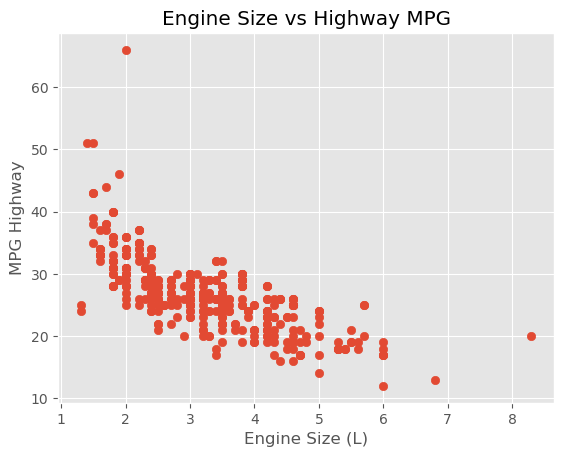

In [36]:
plt.scatter(car['EngineSize'], car['MPG_Highway'])
plt.title("Engine Size vs Highway MPG")
plt.xlabel("Engine Size (L)")
plt.ylabel("MPG Highway")
plt.grid(True)
plt.show()

# 4.Find Average Price of Cars by Origin
Understand which region's cars are more expensive on average.

In [28]:
average_price_by_origin = car.groupby('Origin')['MSRP'].mean()
average_price_by_origin


Origin
Asia      24458.080247
Europe    48349.796748
USA       28377.442177
Name: MSRP, dtype: float64

# 5. Most Common Car Type by Origin

In [29]:
most_common_type = car.groupby('Origin')['Type'].agg(lambda x: x.mode()[0])
most_common_type


Origin
Asia      Sedan
Europe    Sedan
USA       Sedan
Name: Type, dtype: object

# 6. Top 5 Most Powerful Cars (by Horsepower)

In [31]:
top_horsepower = car.sort_values(by='Horsepower', ascending=False).head(5)
top_horsepower[['Make', 'Model', 'Horsepower']]


,Make,Model,Horsepower
116,Dodge,Viper SRT-10 convertible 2dr,500.0
266,Mercedes-Benz,CL600 2dr,493.0
275,Mercedes-Benz,SL600 convertible 2dr,493.0
274,Mercedes-Benz,SL55 AMG 2dr,493.0
338,Porsche,911 GT2 2dr,477.0


# 7. Cars with Best Fuel Efficiency (MPG_Highway)

In [32]:
best_mpg = car.sort_values(by='MPG_Highway', ascending=False).head(5)
best_mpg[['Make', 'Model', 'MPG_Highway']]


,Make,Model,MPG_Highway
152,Honda,Insight 2dr (gas/electric),66.0
151,Honda,Civic Hybrid 4dr manual (gas/electric),51.0
377,Toyota,Prius 4dr (gas/electric),51.0
408,Volkswagen,Jetta GLS TDI 4dr,46.0
157,Honda,Civic HX 2dr,44.0


# 8. Create Price Categories (Budget, Mid, Luxury)

In [43]:
def categorize_price(msrp):
    if msrp < 20000:
        return 'Budget'
    elif msrp < 40000:
        return 'Mid-Range'
    else:
        return 'Luxury'

car['Price_Category'] = car['MSRP'].apply(categorize_price)
car[['Make', 'Model', 'MSRP', 'Price_Category']].head(10)


,Make,Model,MSRP,Price_Category
0,Acura,MDX,36945.0,Mid-Range
1,Acura,RSX Type S 2dr,23820.0,Mid-Range
2,Acura,TSX 4dr,26990.0,Mid-Range
3,Acura,TL 4dr,33195.0,Mid-Range
4,Acura,3.5 RL 4dr,43755.0,Luxury
5,Acura,3.5 RL w/Navigation 4dr,46100.0,Luxury
6,Acura,NSX coupe 2dr manual S,89765.0,Luxury
7,Audi,A4 1.8T 4dr,25940.0,Mid-Range
8,Audi,A41.8T convertible 2dr,35940.0,Mid-Range
9,Audi,A4 3.0 4dr,31840.0,Mid-Range


# 9. Compare Weight vs Horsepower (Efficiency Metric)

In [35]:
car['Power_to_Weight'] = car['Horsepower'] / car['Weight']
car.sort_values(by='Power_to_Weight', ascending=False)[['Make', 'Model', 'Horsepower', 'Weight', 'Power_to_Weight']].head(5)


,Make,Model,Horsepower,Weight,Power_to_Weight
338,Porsche,911 GT2 2dr,477.0,3131.0,0.152347
116,Dodge,Viper SRT-10 convertible 2dr,500.0,3410.0,0.146628
274,Mercedes-Benz,SL55 AMG 2dr,493.0,4235.0,0.116411
20,Audi,RS 6 4dr,450.0,4024.0,0.111829
275,Mercedes-Benz,SL600 convertible 2dr,493.0,4429.0,0.111312


# 10. Normalize Horsepower (Min-Max Scaling using NumPy)

In [42]:
horsepower = car['Horsepower'].values
normalized_hp = (horsepower - np.min(horsepower)) / (np.max(horsepower) - np.min(horsepower))
car['Normalized_Horsepower'] = normalized_hp
car[['Make', 'Model', 'Horsepower', 'Normalized_Horsepower']].head(10)

,Make,Model,Horsepower,Normalized_Horsepower
0,Acura,MDX,265.0,0.449649
1,Acura,RSX Type S 2dr,200.0,0.297424
2,Acura,TSX 4dr,200.0,0.297424
3,Acura,TL 4dr,270.0,0.461358
4,Acura,3.5 RL 4dr,225.0,0.355972
5,Acura,3.5 RL w/Navigation 4dr,225.0,0.355972
6,Acura,NSX coupe 2dr manual S,290.0,0.508197
7,Audi,A4 1.8T 4dr,170.0,0.227166
8,Audi,A41.8T convertible 2dr,170.0,0.227166
9,Audi,A4 3.0 4dr,220.0,0.344262


# 11. Bar Chart: Number of Cars by Type

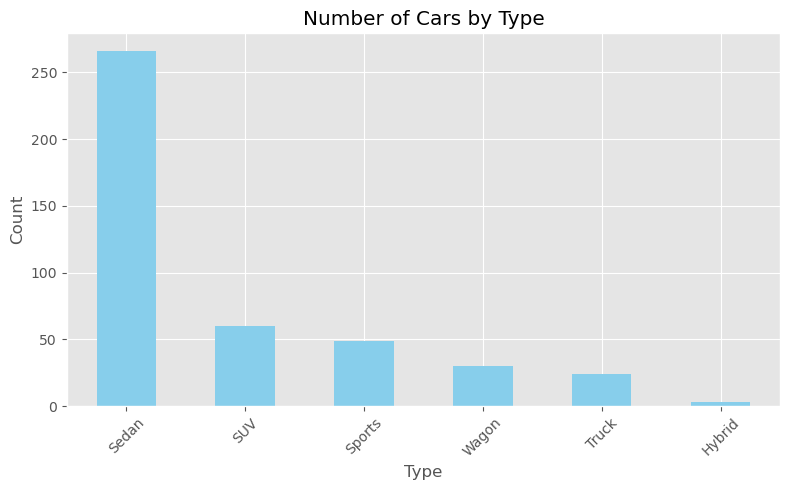

In [44]:
car_counts_by_type = car['Type'].value_counts()

plt.figure(figsize=(8,5))
car_counts_by_type.plot(kind='bar', color='skyblue')
plt.title('Number of Cars by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 12. Pie Chart: Distribution of Cars by Origin

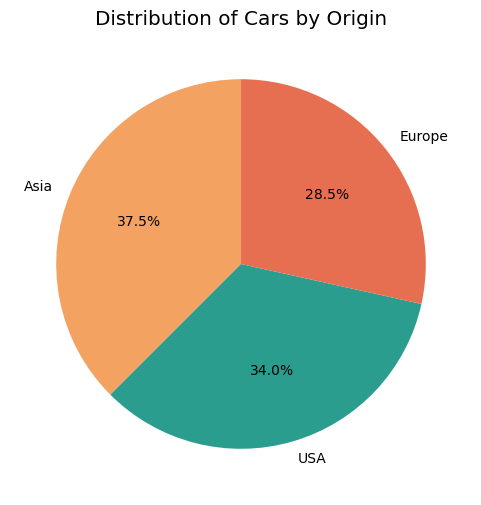

In [45]:
origin_counts = car['Origin'].value_counts()

plt.figure(figsize=(6,6))
origin_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#f4a261', '#2a9d8f', '#e76f51'])
plt.title('Distribution of Cars by Origin')
plt.ylabel('')
plt.show()


# 13. Find Cars with MSRP Above the Mean 

In [38]:
msrp_mean = np.mean(car['MSRP'])
car_above_mean = car[car['MSRP'] > msrp_mean]
car_above_mean[['Make', 'Model', 'MSRP']].head()


,Make,Model,MSRP
0,Acura,MDX,36945.0
3,Acura,TL 4dr,33195.0
4,Acura,3.5 RL 4dr,43755.0
5,Acura,3.5 RL w/Navigation 4dr,46100.0
6,Acura,NSX coupe 2dr manual S,89765.0


# 14. Predictive Insight: Simple Linear Regression (Price vs Horsepower)

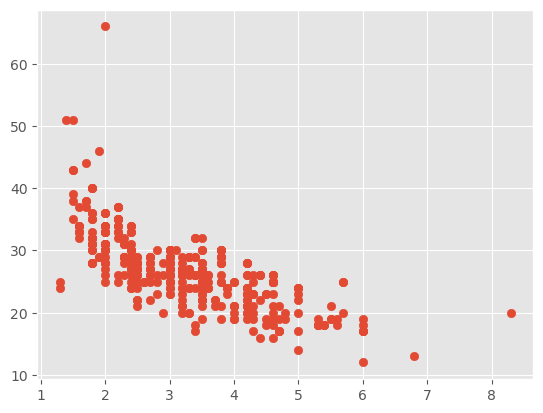

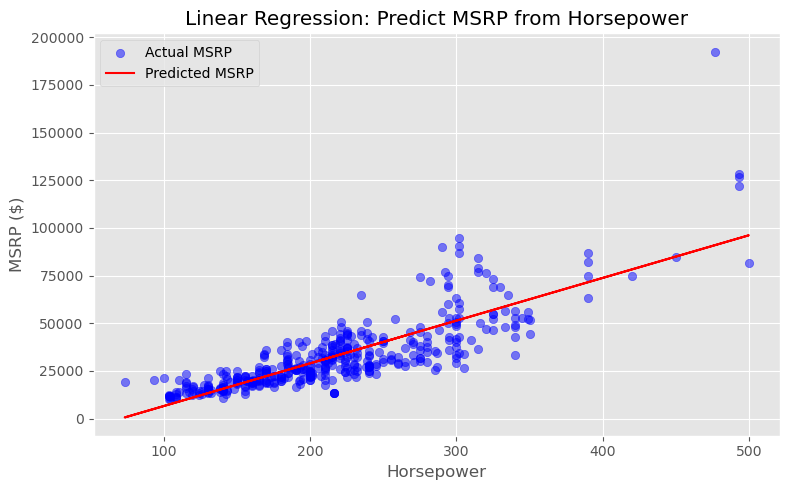

In [53]:
X = car[['Horsepower']]  
y = car['MSRP']          

model = LinearRegression()
model.fit(X, y)

car['Predicted_MSRP'] = model.predict(X)

plt.figure(figsize=(8, 5))
plt.scatter(car['Horsepower'], car['MSRP'], color='blue', alpha=0.5, label='Actual MSRP')
plt.plot(car['Horsepower'], car['Predicted_MSRP'], color='red', label='Predicted MSRP')
plt.title('Linear Regression: Predict MSRP from Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('MSRP ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 15. Asian SUVs Under $30k

In [50]:
car[(car['Origin'] == 'Asia') & (car['Type'] == 'SUV') & (car['MSRP'] < 30000)]


,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Price_Category,Power_to_Weight,Normalized_Horsepower
153,Honda,Pilot LX,SUV,Asia,All,27560.0,"$24,843",3.5,6.0,240.0,17.0,22.0,4387.0,106.0,188.0,Mid-Range,0.054707,0.391101
154,Honda,CR-V LX,SUV,Asia,All,19860.0,"$18,419",2.4,4.0,160.0,21.0,25.0,3258.0,103.0,179.0,Budget,0.049110,0.203747
155,Honda,Element LX,SUV,Asia,All,18690.0,"$17,334",2.4,4.0,160.0,21.0,24.0,3468.0,101.0,167.0,Budget,0.046136,0.203747
170,Hyundai,Santa Fe GLS,SUV,Asia,Front,21589.0,"$20,201",2.7,6.0,173.0,20.0,26.0,3549.0,103.0,177.0,Mid-Range,0.048746,0.234192
192,Isuzu,Rodeo S,SUV,Asia,Front,20449.0,"$19,261",3.2,6.0,193.0,17.0,21.0,3836.0,106.0,178.0,Mid-Range,0.050313,0.281030
208,Kia,Sorento LX,SUV,Asia,Front,19635.0,"$18,630",3.5,6.0,192.0,16.0,19.0,4112.0,107.0,180.0,Budget,0.046693,0.278689
244,Mazda,Tribute DX 2.0,SUV,Asia,All,21087.0,"$19,742",2.0,4.0,130.0,22.0,25.0,3091.0,103.0,173.0,Mid-Range,0.042058,0.133489
292,Mitsubishi,Outlander LS,SUV,Asia,Front,18892.0,"$17,569",2.4,4.0,160.0,21.0,27.0,3240.0,103.0,179.0,Budget,0.049383,0.203747
304,Nissan,Pathfinder SE,SUV,Asia,Front,27339.0,"$25,972",3.5,6.0,240.0,16.0,21.0,3871.0,106.0,183.0,Mid-Range,0.061999,0.391101
305,Nissan,Xterra XE V6,SUV,Asia,Front,20939.0,"$19,512",3.3,6.0,180.0,17.0,20.0,3760.0,104.0,178.0,Mid-Range,0.047872,0.250585


📝 **Summary of 15 Learnings**
Groups cars by origin and calculates average MSRP.
Useful for comparing price trends by region.

Finds the most frequent vehicle type per region.
Helps identify regional manufacturing preferences.

Sorts cars by horsepower and shows the top 5.
Highlights high-performance models for enthusiasts.

Ranks cars by highway MPG to find the most fuel-efficient.
Ideal for eco-conscious or budget-focused buyers.

Counts how many models each brand has in the dataset.
Indicates which manufacturers are most represented.

Calculates efficiency using horsepower divided by weight.
Helpful for analyzing sporty or lightweight cars.

Filters for Asian-made SUVs with MSRP < $30,000.
Targets affordable SUV options for a niche market.

Calculates efficiency using horsepower divided by weight.
Helpful for analyzing sporty or lightweight cars.

Measures price variation across car origins.
Higher values show greater price diversity.

Scales horsepower between 0 and 1 using min-max.
Helps in visual comparisons or ML preprocessing.

Shows each origin’s share of the dataset.
Great for illustrating brand/global diversity